In [1]:
import csv
import pandas as pd
characterlist=pd.read_csv('character_list5.csv', encoding='windows-1252')
charactermap=pd.read_csv('character_mapping.csv', encoding='windows-1252')
metadata=pd.read_csv('meta_data7.csv', encoding='windows-1252')

In [2]:
#character_list5 contains a data structure of the ID of what script the character came from, the name of the character, how many words they spoke, their gender, and their age
#meta_data7 contains the background info on all the films from which the scripts were sources, like their ID number in imdb, their title, year published, gross money earned, and the numbers for male lines for half a minute
#character mapping contains data on the characters from the script, their imdb id, the movie's imdb id, the script id from where they're from, and their imdb names

In [3]:
characterlist.isna().any()
#some character names and ages are missing

script_id              False
imdb_character_name     True
words                  False
gender                 False
age                     True
dtype: bool

In [4]:
charactermap.isna().any
#one "closest character name from imdb match is missing"

<bound method NDFrame._add_numeric_operations.<locals>.any of        script_id  imdb_id  character_from_script  \
0          False    False                  False   
1          False    False                  False   
2          False    False                  False   
3          False    False                  False   
4          False    False                  False   
...          ...      ...                    ...   
99385      False    False                  False   
99386      False    False                  False   
99387      False    False                  False   
99388      False    False                  False   
99389      False    False                  False   

       closest_character_name_from_imdb_match  closest_imdb_character_id  
0                                       False                      False  
1                                       False                      False  
2                                       False                      False  
3            

In [5]:
metadata.isna().any
#some gross income is missing

<bound method NDFrame._add_numeric_operations.<locals>.any of       script_id  imdb_id  title   year  gross  lines_data
0         False    False  False  False  False       False
1         False    False  False  False  False       False
2         False    False  False  False   True       False
3         False    False  False  False  False       False
4         False    False  False  False  False       False
...         ...      ...    ...    ...    ...         ...
1995      False    False  False  False  False       False
1996      False    False  False  False  False       False
1997      False    False  False  False  False       False
1998      False    False  False  False   True       False
1999      False    False  False  False  False       False

[2000 rows x 6 columns]>

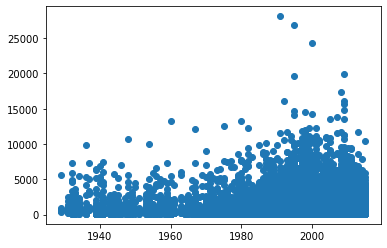

In [6]:
overtime=pd.merge(metadata, characterlist)
overtime=overtime.drop(columns=['script_id', 'imdb_id', 'title', 'lines_data', 'title', 'gender', 'age', 'imdb_character_name', 'gross'])
import matplotlib.pyplot as plt
plt.plot(overtime['year'], overtime['words'], 'o')
#amount of dialogue seems to be increasing over time. this might make it seem as though more women are talking now, but the division of talking may still be more men than women

In [7]:
characterlistnew=characterlist.drop(columns=['age', 'gender', 'imdb_character_name'])
characterlistnames=characterlistnew.groupby('script_id')['words'].sum().reset_index()
cleanmeta=metadata.drop(columns=['imdb_id', 'title', 'year', 'lines_data', 'title'])
grosswords=pd.merge(cleanmeta, characterlistnames, on='script_id')
grosswordsclean=grosswords[grosswords.gross >= 0]
final = grosswordsclean.groupby('gross')['words'].sum().reset_index()
final=final.dropna()

AttributeError: 'Line2D' object has no property 'kind'

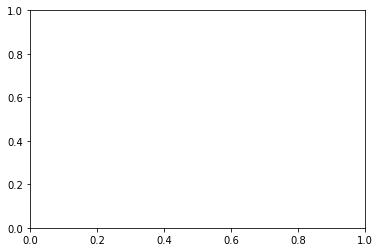

In [9]:
plt.plot(final['gross'], final['words'], kind='scatter')
plt.xlabel('gross')
plt.ylabel('words')
#as the gross income increases, it seems as though words spoken decreases